# 미니 프로젝트 : 가위바위보 분류기를 만들자

## 1. 데이터 준비

### 1-1. 데이터 만들기
노트북 카메라를 이용하여 가위, 바위, 보 이미지 각 100장을 만들어본다. 구글의 teachable machine 사이트에서 쉽게 데이터를 만들 수 있다.

[https://teachablemachine.withgoogle.com/](https://teachablemachine.withgoogle.com/)

- 여러 각도에서 찍기
- 여러 크기로 찍기
- 여러 명이 찍기

좋은 데이터가 좋은 결과를 낳는다.

teachable machine을 통해서 이미지를 저장하면 이미지는 224x224 크기로 되어 있다.

### 1-2. 데이터 불러오기 + Resize 하기
가위, 바위, 보 이미지를 28x28로 만들어야 한다. 이를 위해 `PIL` 라이브러리를 사용한다.

In [1]:
from PIL import Image
import os, glob
# !nvidia-smi

In [2]:
import os

IMG_SIZE = 28 # 이미지 사이즈
total_image = 0 # 전체 이미지 개수

# 이미지를 리사이즈 해주는 함수
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    global total_image 
    total_image += len(images)
    
    print(f"{len(images)} images will be resized.")
    
    # resize all images to 28x28
    target_size=(IMG_SIZE, IMG_SIZE) # 28x28 size
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(f"{len(images)} images have been resized.\n")

In [3]:
# Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# Colab
# paper_dir = "/content/drive/MyDrive/data/train/paper"
# rock_dir = "/content/drive/MyDrive/data/train/rock"
# scissor_dir = "/content/drive/MyDrive/data/train/scissors"
# train_data_path = "/content/drive/MyDrive/data/train"


# img_dir = [scissor_dir, rock_dir, paper_dir]

In [5]:
scissor_dir = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissors"
rock_dir = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
paper_dir = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
train_data_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"


img_dir = [scissor_dir, rock_dir, paper_dir]

In [6]:
from tqdm import tqdm

for image in tqdm(img_dir):
    resize_images(image)
    
print("이미지 resize 완료!")

  0%|          | 0/3 [00:00<?, ?it/s]

994 images will be resized.


 33%|███▎      | 1/3 [00:00<00:01,  1.50it/s]

994 images have been resized.

1105 images will be resized.


 67%|██████▋   | 2/3 [00:01<00:00,  2.01it/s]

1105 images have been resized.

1108 images will be resized.


100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

1108 images have been resized.

이미지 resize 완료!


In [7]:
# 총 이미지 개수
print(total_image)

3207


### 1-3. 가위, 바위, 보 데이터를 읽는 `load_data()` 함수 만들기

`load_data()` 함수는 입력으로 이미지가 있는 폴더 위치를 받는다. 여기서는 `rock_scissor_paper` 폴더 위치를 적어주면 된다.

In [8]:
import numpy as np

def load_data(img_path, number_of_data=300): 
    """    
    parameters:
        img_path: The directory path of the rock_scissor_paper
        number_of_data: The total nubmer of all images. Default value is 300.
    return:
        image data, label data
    """
    # scissors: 0, rock: 1, paper: 2
    img_size = IMG_SIZE
    color = 3
    
    # image data
    imgs = np.zeros(number_of_data * img_size * img_size * color, 
                    dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)
    
    idx = 0
    for file in glob.iglob(img_path + '/scissors/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0 # 가위 : 0
        idx = idx + 1
        
    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1 # 바위 : 1
        idx = idx + 1
    
    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2 # 보 : 2
        idx = idx + 1
        
    print(f"총 이미지 개수는 {idx} 입니다.")
    return imgs, labels

In [9]:
# load data
(X, y) = load_data(train_data_path, number_of_data=3207)

총 이미지 개수는 3207 입니다.


### 1-4. train, test data 나누기

In [10]:
# train data와 test data 나누어 주기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (2565, 28, 28, 3)
y_train shape: (2565,)
X_test shape: (642, 28, 28, 3)
y_test shape: (642,)


In [11]:
# 정규화
X_train = X_train / 255.0   # 입력을 0~1 사이의 값으로 정규화

라벨:  2


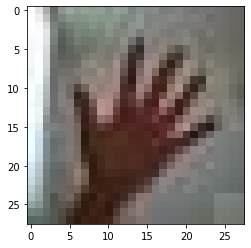

In [12]:
# 이미지 확인 (가위:0, 바위:1, 보:2)
import matplotlib.pyplot as plt

plt.imshow(X_train[1000])
print('라벨: ', y_train[1000])

## 2. 딥러닝 네트워크 설계하기

In [13]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(IMG_SIZE, IMG_SIZE, 3), kernel_size=(3, 3), 
                           filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

**합성곱 신경망(CNN)의 구조**
1. 입력층: 입력 이미지 데이터가 최초로 거치게 되는 계층이다.
2. 합성곱층(convolutional layer): 입력 데이터에서 특성을 추출하는 층이다.
    - 입력 이미지가 들어왔을 떄 이미지에 대한 특성을 감시잫기 위해 커널(kernel)이나 필터(filter)를 사용한다. 커널/필터는 이미지의 모든 영역을 훑으면서 특성을 추출하게 되는데, 이렇게 추출된 결과물이 특성 맵(feature map)이다.
3. 풀링층(pooling layer): 풀링층은 합성곱층과 유사하게 특성 맵의 차원을 다운 샘플링하여 연산량을 감소시키고, 주요한 벡터를 추출하여 학습을 효과적으로 할 수 있게 한다.
4. 완전연결층(fully conneted layer)
5. 드롭아웃(dropout): 신경망 모델이 과적합되는 것을 피하기 위한 방법으로, 학습 과정 중 임의로 일부 노드들을 학습에서 제외시킨다.
6. 출력층(output layer): 소프트맥스 활성화 함수가 사용되는데, 입력받은 값을 0~1 사이의 값으로 출력한다.

**Conv**
특성을 만든다.
```python
tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1))
```
- 첫 번째 파라미터: 합성곱 필터 개수
- 두 번째 파라미터: 합성곱 커널의 해오가 열
- `padding`: 경계 처리 방법
    - `valid`: 유요한 영역만 출력되므로 출력 이미지 크기는 입력 이미지 크기보다 작다.
    - `same`: 출력 이미지 크기가 입력 이미지 크기와 동일하다.
- `activation`: 활성화 함수 설정
    - `linear`: 기본값
    - `relu`
    - `sigmoid`
    - `tanh`
    - `softmax`
- `input_shape`

**Pooling**
차원을 감소시킨다.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0

## 3. 딥러닝 네트워크 학습시키기

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

`compile()`에서 사용하는 주요 파라미터
- `optimizer`: 옵티머이저란 손실 함수를 사용하여 구한 값으로 기울기를 구하고 네트워크의 파리미터를 학습에 어떻게 반영할지 결정하는 방법으로, 여기서는 `adam`을 사용한다.
    - Adam은 Momoentum과 RMSProp의 장점을 결합한 경사 하강법이다.
- `loss`: 최적화 과정에서 사용될 손실 함수(loss function)을 설정한다. 다수의 클래스를 분류하기 떄문에 `sparse_categorical_crossentropy` 손실 함수르 사용한다.
- `metrics`: 모델의 평가 기준을 지정한다.

In [16]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.25)

Epoch 1/25
61/61 [==============================] - 12s 112ms/step - loss: 1.1210 - accuracy: 0.3336 - val_loss: 1.0973 - val_accuracy: 0.3505
Epoch 2/25
61/61 [==============================] - 1s 15ms/step - loss: 1.0995 - accuracy: 0.3546 - val_loss: 1.0963 - val_accuracy: 0.3505
Epoch 3/25
61/61 [==============================] - 1s 15ms/step - loss: 1.0984 - accuracy: 0.3270 - val_loss: 1.0965 - val_accuracy: 0.3505
Epoch 4/25
61/61 [==============================] - 1s 15ms/step - loss: 1.0961 - accuracy: 0.3696 - val_loss: 1.0950 - val_accuracy: 0.3505
Epoch 5/25
61/61 [==============================] - 1s 15ms/step - loss: 1.0900 - accuracy: 0.3687 - val_loss: 0.9996 - val_accuracy: 0.4953
Epoch 6/25
61/61 [==============================] - 1s 15ms/step - loss: 0.9970 - accuracy: 0.4843 - val_loss: 0.8200 - val_accuracy: 0.5405
Epoch 7/25
61/61 [==============================] - 1s 15ms/step - loss: 0.8970 - accuracy: 0.5362 - val_loss: 0.7333 - val_accuracy: 0.6807
Epoch 8/25


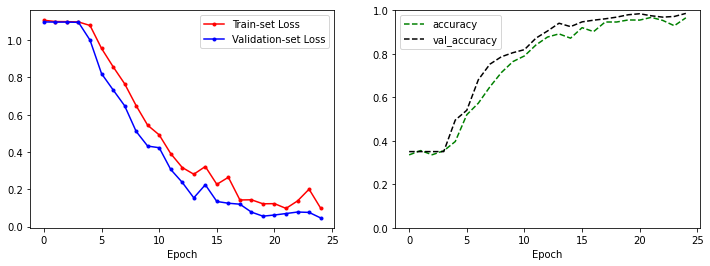

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], marker='.', c='red', label='Train-set Loss')
plt.plot(history.history['val_loss'], marker='.', c='blue', label='Validation-set Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g--', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend()

plt.show()

## 4. test 데이터로 테스트

In [18]:
X_test = X_test / 255.0 # test data 정규화

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

21/21 - 0s - loss: 0.0595 - accuracy: 0.9798
test_loss: 0.0595426931977272
test_accuracy: 0.9797507524490356


In [19]:
predicted_result = model.predict(X_test) # model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1) # 확률의 최대값이 예측하는 숫자를 뜻한다

idx = 512
print(f"models.predict() 결과: {predicted_result[idx]}\n")
print(f"model이 추론한 가장 가능성이 높은 결과 : ", predicted_labels[idx])
print(f"실제 데이터의 라벨 : ", y_test[idx])

models.predict() 결과: [1.3321467e-17 1.0000000e+00 3.3509769e-14]

model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  1


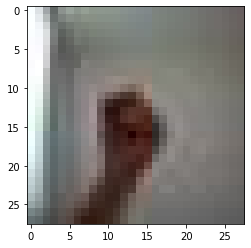

In [20]:
# 실제 이미지 출력
plt.imshow(X_test[idx], cmap=plt.cm.binary)
plt.show()

### 특성맵 시각화

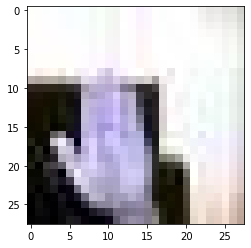

In [21]:
import cv2

# 이미지 호출
img = cv2.imread(paper_dir + r'/paper (100).jpg')
plt.imshow(img)

In [22]:
# 특성맵 시각화
import cv2
from tensorflow.keras.models import Model

ins = model.inputs # 모델의 입력 형태
outs = model.layers[0].output # 첫 번째 계층에 대한 출력의 형태
feature_map = Model(inputs=ins, outputs=outs) # 특성맵 정의
feature_map.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


(1, 28, 28, 3)
(1, 28, 28, 32)


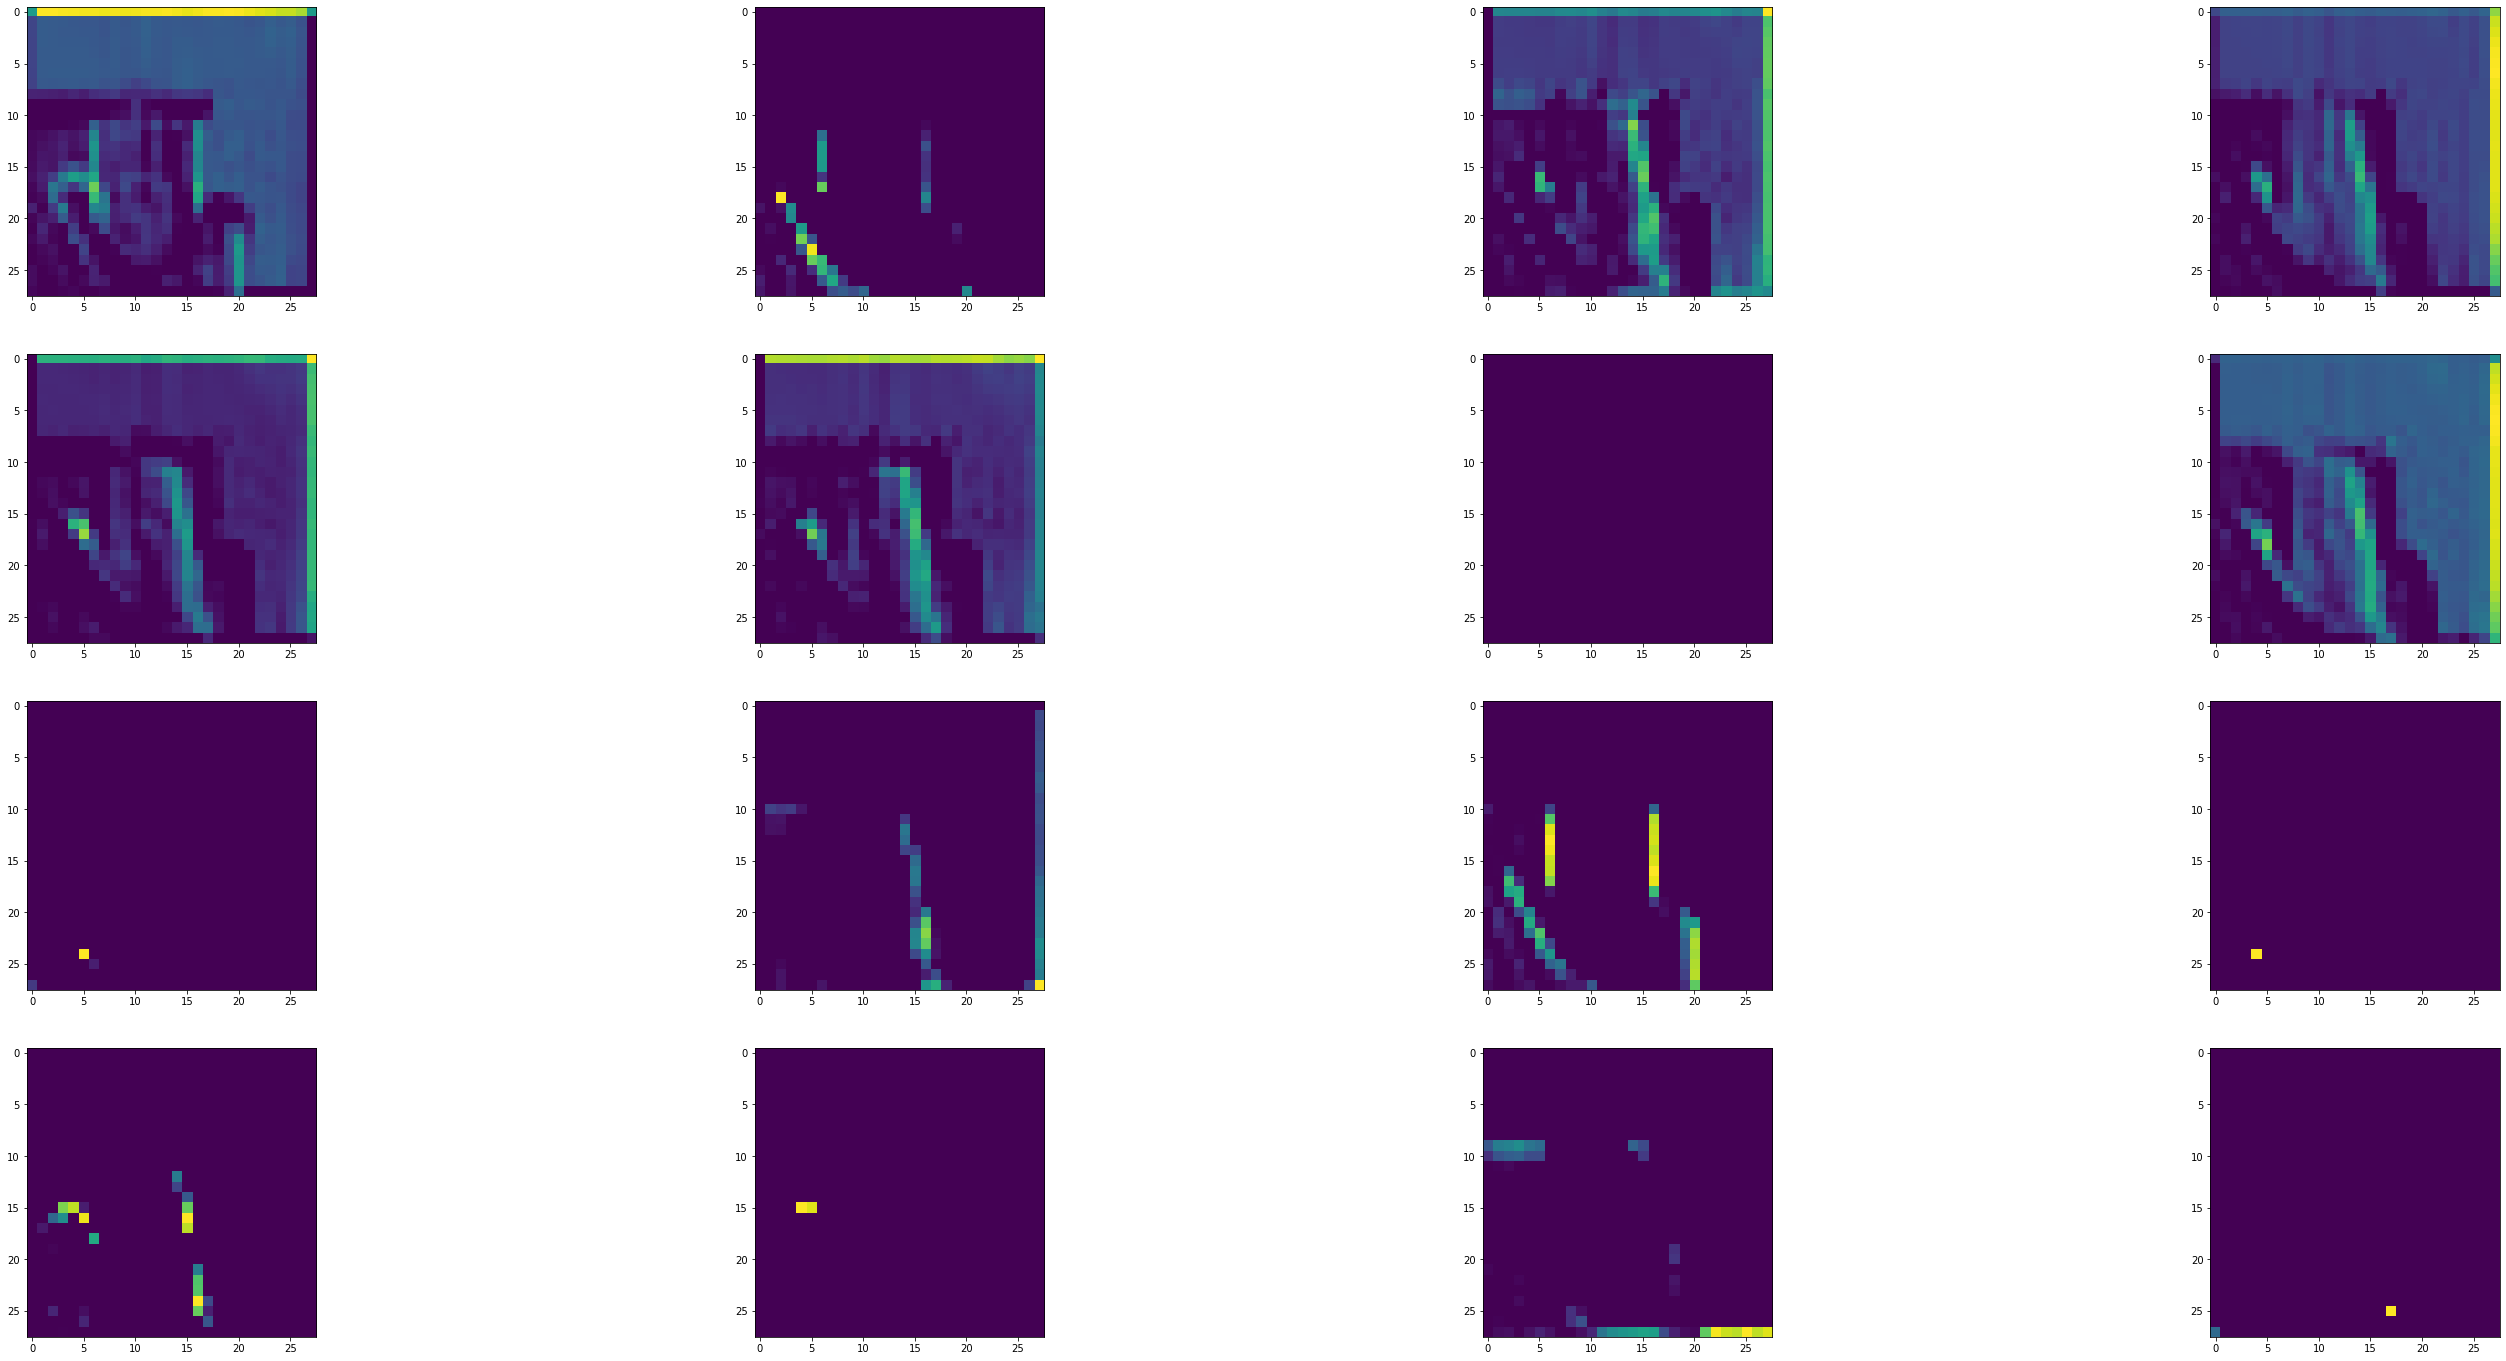

In [23]:
img = cv2.resize(img, (28, 28)) # 이미지 크기 조정
input_img = np.expand_dims(img, axis=0)
print(input_img.shape)

# 특성 맵 확인
feature = feature_map.predict(input_img) # 이미지를 모델에 적용
print(feature.shape)
fig = plt.figure(figsize=(50, 50))
for i in range(16):
    ax = fig.add_subplot(8, 4, i + 1)
    ax.imshow(feature[0,:,:,i])

## 5. 완전히 새로운 데이터로 테스트

In [24]:
# colab
# scissor_test = "/content/drive/MyDrive/data/test/scissors"
# rock_test = "/content/drive/MyDrive/data/test/rock"
# paper_test = "/content/drive/MyDrive/data/test/paper"
# test_path = "/content/drive/MyDrive/data/test"

scissor_test = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissors"
rock_test = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
paper_test = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
test_path = paper_test_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

test_paths = [scissor_test, rock_test, paper_test]

# 새로운 데이터 리사이즈
for path in test_paths:
    resize_images(path) 

(X_new, y_new)=load_data(test_path)
X_new_norm = X_new / 255.0



test_loss, test_accuracy = model.evaluate(X_new_norm, y_new, verbose=2)

print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

100 images will be resized.
100 images have been resized.

100 images will be resized.
100 images have been resized.

100 images will be resized.
100 images have been resized.

총 이미지 개수는 300 입니다.
10/10 - 2s - loss: 2.2896 - accuracy: 0.6900
test_loss: 2.289597272872925
test_accuracy: 0.6899999976158142


## 6. 더 좋은 네트워크 만들어보기
- [x] 더 많은 데이터 추가하기
- [x] Validation Set 만들기
- [x] 하이퍼파라미터 변경
- [x] 딥러닝 모델 바꾸기

### 6-1. 이미지 보강

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.10,
            shear_range=0.5,
            width_shift_range=0.10,
            height_shift_range=0.10,
            horizontal_flip=True,
            vertical_flip=False)

augment_size = 30000

randidx = np.random.randint(X_train.shape[0], size=augment_size)
x_augmented = X_train[randidx].copy()
y_augmented = y_train[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size=augment_size, shuffle=False).next()[0]

**ImageDataGenerator**
- `rescale`: 스케일링
- `rotation_range`: 이미지 회전 범위
- `width_shift_range`: 그림을 수평으로 랜덤하게 평행 이동 시키는 범위
- `height_shift_range`: 그림을 수직으로 랜덤하게 평행 이동 시키는 범위
- `shear_range`: 원본 이미지를 임의로 변형(전단) 시키는 범위. 0.5 라디안 내위로 시계 반대 방햐으로 이미지 변환
- `zoom_range`: 임의 확대/축소 범위

In [26]:
X_train = np.concatenate((X_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))

print(X_train.shape)

(32565, 28, 28, 3)


### 6-2. 다시 학습 및 테스트

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(IMG_SIZE, IMG_SIZE, 3), kernel_size=(3, 3), 
                           filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=25, validation_split=0.25)

Epoch 1/25
764/764 [==============================] - 19s 24ms/step - loss: 1.1030 - accuracy: 0.3484 - val_loss: 1.0926 - val_accuracy: 0.3725
Epoch 2/25
764/764 [==============================] - 11s 15ms/step - loss: 0.9858 - accuracy: 0.4644 - val_loss: 0.8158 - val_accuracy: 0.5668
Epoch 3/25
764/764 [==============================] - 11s 15ms/step - loss: 0.8287 - accuracy: 0.5668 - val_loss: 0.6663 - val_accuracy: 0.7063
Epoch 4/25
764/764 [==============================] - 11s 15ms/step - loss: 0.6557 - accuracy: 0.6984 - val_loss: 0.4130 - val_accuracy: 0.8330
Epoch 5/25
764/764 [==============================] - 11s 15ms/step - loss: 0.4430 - accuracy: 0.8194 - val_loss: 0.2805 - val_accuracy: 0.8999
Epoch 6/25
764/764 [==============================] - 11s 15ms/step - loss: 0.3332 - accuracy: 0.8686 - val_loss: 0.1929 - val_accuracy: 0.9311
Epoch 7/25
764/764 [==============================] - 11s 15ms/step - loss: 0.2623 - accuracy: 0.8996 - val_loss: 0.1980 - val_accuracy:

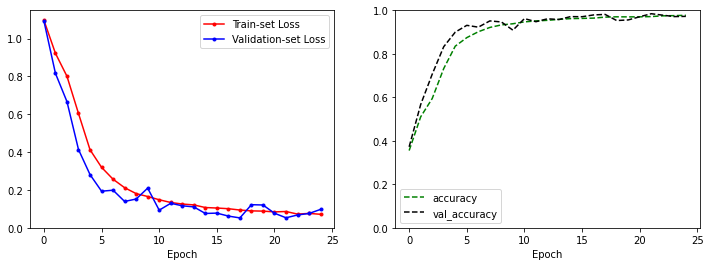

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], marker='.', c='red', label='Train-set Loss')
plt.plot(history.history['val_loss'], marker='.', c='blue', label='Validation-set Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g--', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend()

plt.show()

In [29]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

21/21 - 0s - loss: 0.0587 - accuracy: 0.9798
test_loss: 0.058687347918748856
test_accuracy: 0.9797507524490356


In [30]:
# colab
# scissor_test = "/content/drive/MyDrive/data/test/scissors"
# rock_test = "/content/drive/MyDrive/data/test/rock"
# paper_test = "/content/drive/MyDrive/data/test/paper"
# test_path = "/content/drive/MyDrive/data/test"

scissor_test = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissors"
rock_test = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
paper_test = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
test_path = paper_test_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

test_paths = [scissor_test, rock_test, paper_test]

# 새로운 데이터 리사이즈
for path in test_paths:
    resize_images(path) 

(X_new, y_new)=load_data(test_path)
X_new_norm = X_new / 255.0



test_loss, test_accuracy = model.evaluate(X_new_norm, y_new, verbose=2)

print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

100 images will be resized.
100 images have been resized.

100 images will be resized.
100 images have been resized.

100 images will be resized.
100 images have been resized.

총 이미지 개수는 300 입니다.
10/10 - 0s - loss: 0.7903 - accuracy: 0.8067
test_loss: 0.7902538776397705
test_accuracy: 0.8066666722297668


## 7. 결론(회고)

- 책을 보고 공부하면서 많이 배웠는데 다음과 같은 내용들을 배웠다.
    - Sequential model 만드는 방법
    - 모델의 각 layer의 의미
    - compile 옵션과 그 의미
    - history와 history 그래프 그리기
    - 이미지 보강하여 데이터 증폭 시키기
  
### 회고 1
- 평가 지표를 맞추기 위해 다음과 같은 시도를 했다.
    - 더 많은 데이터 추가하기: 처음에 내가 찍은 사진 데이터 300장으로만 테스트 했는데 정확도 15%가 나왔었다. 이 후 사진을 더 추가하여 3000여장으로 늘렸다. 그 결과 정확도가 40% 정도 되었다.
    - train, test 세트 나누기: 처음에는 train, test 셋으로 나누지 않고, 전체 데이터를 학습 시킨 후 완전 새로운 데이터로 테스트를 했었다. 이 방법 대신 train_test_split으로 train, test 셋을 나누어주었다. 그 결과 정확도가 70~80% 정도가 되었다. 완전 새로운 데이터보다는 정확도가 더 높게 나오게 된 것이다.
    - Validation Set 만들기: train, test set 뿐만 아니라 validation set도 추가하였다. 이전에는 scikit-learn의 train_test_split을 두 번 사용해서 나눴었는데, tensorflow의 fit에 옵션을 validation_split 넣어주면서 간단히 validation set이 나누어 주었다.
    - history 부분 추가: history를 이용해 그래프를 그림으로써 나의 모델이 무엇이 부족한지 한 눈에 보이도록 만들었다.
    - 딥러닝 모델 바꾸기: 책을 보면서 컨벌루션 레이어, 풀링 레이어, 드롭 아웃 레이어 등을 추가 하였다. 
    - 하이퍼파라미터 변경: 하이퍼파라미터 부분은 손을 대면 댈수록 결과가 나빠져서 되도록 그대로 두었다. 
    - 이미지 데이터 증폭: 이 부분이 신기했다. 이미지들을 약간씩 수정해 데이터를 증폭시켜 이미지 데이터의 부족함을 극복하는 것이다. 그 결과 테스트 정확도가 100%가 되었다.
- Tensorflow를 사실상 처음 사용해봤고 딥러닝에 대한 지식 특히 CNN에 대한 지식이 거의 없어서 많이 힘들었다. 이번 프로젝트에서 만든 모델의 각 부분이 무엇을 의미하는지는 알겠는데 왜 이렇게 레이어들을 쌓았고, 하이퍼파라미터 값은 왜 이 값으로 넣었는지는 아직 잘 모르겠다. CNN, Tensorflow에 대해 더 공부해야 한다.

### 회고 2
- 추가적으로 CNN에 대한 학습을 한 후 여러가지 실험을 해봤다.
- 이미지를 증폭시키고 완전히 새로운 데이터에 대해 테스트를 해본 결과 68% -> 80%로 정확도가 향상되었다.